In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from scipy.constants import k as k_B
from scipy.constants import N_A
import seaborn as sns

In [3]:
filenm = 'CG-metad/phi-reweight.weight'
reference = 'AA-metad/phi-reweight.weight' 
CG = pd.read_csv(filenm, sep=' ', header=None, names=['phi', 'weight'])
AA = pd.read_csv(reference, sep=' ', header=None, names=['phi-AA','phi','psi', 'weight'])
CG_other = pd.read_csv('CG-metad/COLVAR', sep=' ',skiprows=5, names=['time', 'phi', 'psi','bias', 'height'])
AA_other = pd.read_csv('AA-metad/COLVAR', sep=' ',skiprows=7, names=['time', 'phi-AA', 'phi', 'psi', 'metad.bias'])

print(CG_other.head(), CG_other.shape)
print(AA_other.head(10), AA_other.shape)
print(AA.head())

     time       phi       psi      bias    height
NaN   0.0 -0.525599  2.083746  0.000000  0.000000
NaN   0.2 -0.431576  2.275409  0.000000  0.000000
NaN   0.4 -0.326879  2.231230  0.033499  0.299998
NaN   0.6 -0.484333  2.220034  0.174043  0.599549
NaN   0.8 -0.482930  2.197364  0.476895  0.897229 (500001, 5)
     time    phi-AA       phi       psi  metad.bias
NaN   0.0  0.281880 -0.319708  2.036558    0.000000
NaN   0.2  0.115606 -0.575644  2.140446    0.000000
NaN   0.4  0.198034 -0.426549  1.922300    0.077085
NaN   0.6  0.327009 -0.386597  2.264719    0.010734
NaN   0.8  0.177357 -0.567197  2.106365    0.417802
NaN   1.0  0.133071 -0.595040  2.097088    0.609722
NaN   1.2 -0.008024 -0.640552  2.121086    0.019557
NaN   1.4  0.085372 -0.528567  2.107516    0.565301
NaN   1.6  0.338149 -0.428307  2.103126    0.300070
NaN   1.8  0.030087 -0.661614  1.933692    0.492287 (500001, 5)
     phi-AA       phi       psi    weight
0  0.281882 -0.323145  2.080608  0.003002
1 -0.102797 -0.79007

<Axes: xlabel='psi', ylabel='Count'>

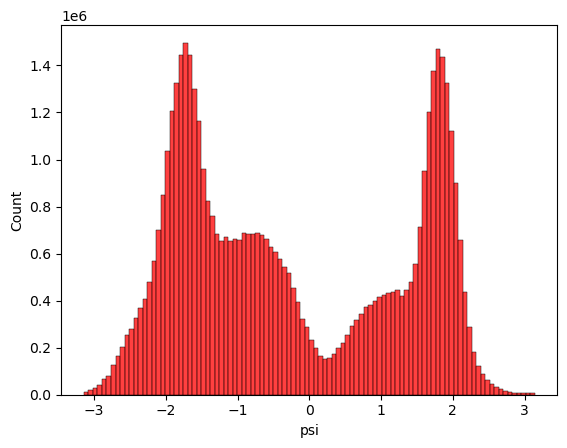

In [28]:
CG_other.loc[CG_other.psi < 0,'psi'] = CG_other.loc[CG_other.psi <0,'psi'] + 2*np.pi 
sns.histplot(x='psi', data=AA_other, bins=100, weights='metad.bias', color='r', label='AA')

In [4]:
def compute_potential(CV, weights):
    hist, bins = np.histogram(CV, bins=100, weights=weights, range=(-np.pi, np.pi))
    hist[hist==0] = np.min(hist[hist!=0])
    centers = (bins[:-1] + bins[1:]) / 2
    V = -k_B * 300 * np.log(hist)*N_A / 1000
    return centers, V


In [9]:
def  plot_potential(df, ax, nbins_use=10, plot_convergence=False, **plotkwargs):
    if plot_convergence:
        for i in range(df.shape[0]//5, df.shape[0]+1, df.shape[0]//5):
            centers, potential = compute_potential(df['psi'][:i], df['weight'][:i])
            ax.plot(centers, potential, **plotkwargs)



    centers, V = compute_potential(df.psi, df.weight)
    error =0
    ax.plot(centers, V, **plotkwargs)
    ax.fill_between(centers, V-error, V +error, alpha=0.5, color=plotkwargs['color'])
    ax.set_xlabel('Phi (rad)')
    ax.set_ylabel('Potential (kJ/mol)')
    ax.set_title('Potential of mean force')
    ax.legend()
    #Print out the distance at which the potential of mean force is minimu
    return ax


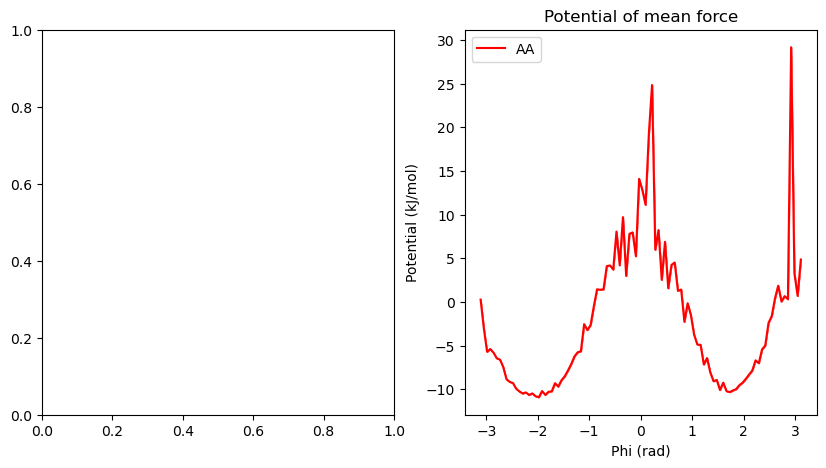

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
#ax = plot_potential(CG, axs[0], color='blue', label='CG', nbins_use=1)
ax = plot_potential(AA, axs[1], color='red', label='AA', nbins_use=1)

In [42]:
print(CG.shape, AA.shape)

NameError: name 'AA' is not defined